# **World Happiness Report**

This dataset mainly focuses on the World Happiness Report from 2015 to 2020. The information that will be included in this dataset are:
   - country
   - region
   - year
   - happiness score
   - influence of GDP on the happiness score (gdp_hscore)
   - influence of life expectancy on the happiness score (lifeexp_hscore)
   - influence of freedom on the happiness score (freedom_hscore)
   - influence of generosity on the happiness score (generosity_hscore)
   - influence of corruption on the happiness score (corruption_hscore)
   - actual GDP (actual_gdpinfluence of GDP on the happiness score)
   - actual life expectancy (actual_lifeexp)
   - actual crime rate (actual_crime)

## Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
import geopandas as gpd
import seaborn as sns
import math as pi

import matplotlib as plt

%matplotlib inline

## Opening CSV Files, Processing Data, and Merging of Dataframes

### World Happiness Report Data

Initial cleaning and processing was done in Microsoft Excel to check if the country names are consistent throughout the years.

Opening the World Happiness Rankings CSV files per year and adding the `year` column.

In [2]:
whr2015 = pd.read_csv('whr/2015.csv')
whr2015['year'] = 2015

whr2016 = pd.read_csv('whr/2016.csv')
whr2016['year'] = 2016

whr2017 = pd.read_csv('whr/2017.csv')
whr2017['year'] = 2017

whr2018 = pd.read_csv('whr/2018.csv')
whr2018['year'] = 2018

whr2019 = pd.read_csv('whr/2019.csv')
whr2019['year'] = 2019

whr2020 = pd.read_csv('whr/2020.csv')
whr2020['year'] = 2020

Deleting the extra columns which will not be used throughout the project.

Note: The `happiness rank` column is deleted since the number of countries would be decreased later on.

In [3]:
del whr2015['Region']
del whr2015['Happiness Rank']
del whr2015['Dystopia Residual']
del whr2015['Family']
del whr2015['Standard Error']

del whr2016['Region']
del whr2016['Happiness Rank']
del whr2016['Dystopia Residual']
del whr2016['Family']
del whr2016['Lower Confidence Interval']
del whr2016['Upper Confidence Interval']

del whr2017['Happiness.Rank']
del whr2017['Dystopia.Residual']
del whr2017['Family']
del whr2017['Whisker.high']
del whr2017['Whisker.low']

del whr2018['Overall rank']
del whr2018['Social support']

del whr2019['Overall rank']
del whr2019['Social support']

del whr2020['Rank']
del whr2020['Standard error of ladder score']
del whr2020['upperwhisker']
del whr2020['lowerwhisker']
del whr2020['Logged GDP per capita']
del whr2020['Social support']
del whr2020['Healthy life expectancy']
del whr2020['Freedom to make life choices']
del whr2020['Generosity']
del whr2020['Perceptions of corruption']
del whr2020['Ladder score in Dystopia']
del whr2020['Dystopia + residual']
del whr2020['Explained by: Social support']

Renaming columns for consistency.

In [4]:
whr2015 = whr2015.rename(columns={'Country':'country', 'Happiness Score':'happiness_score','Economy (GDP per Capita)':'gdp_hscore',
                                  'Health (Life Expectancy)':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust (Government Corruption)':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2016 = whr2016.rename(columns={'Country':'country', 'Happiness Score':'happiness_score', 'Economy (GDP per Capita)':'gdp_hscore',
                                  'Health (Life Expectancy)':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust (Government Corruption)':'corruption_hscore','Generosity':'generosity_hscore'})

whr2017 = whr2017.rename(columns={'Country':'country', 'Happiness.Score':'happiness_score', 'Economy..GDP.per.Capita.':'gdp_hscore',
                                  'Health..Life.Expectancy.':'lifeexp_hscore', 'Freedom':'freedom_hscore', 
                                  'Trust..Government.Corruption.':'corruption_hscore','Generosity':'generosity_hscore'})

whr2018 = whr2018.rename(columns={'Country or region':'country', 'Score':'happiness_score', 'GDP per capita':'gdp_hscore',
                                  'Healthy life expectancy':'lifeexp_hscore', 'Freedom to make life choices':'freedom_hscore', 
                                  'Perceptions of corruption':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2019 = whr2019.rename(columns={'Country or region':'country', 'Score':'happiness_score', 'GDP per capita':'gdp_hscore',
                                  'Healthy life expectancy':'lifeexp_hscore', 'Freedom to make life choices':'freedom_hscore',
                                  'Perceptions of corruption':'corruption_hscore', 'Generosity':'generosity_hscore'})

whr2020 = whr2020.rename(columns={'Country name':'country', 'Regional indicator':'region', 'Ladder score':'happiness_score',
                                  'Explained by: Log GDP per capita':'gdp_hscore', 'Explained by: Healthy life expectancy':'lifeexp_hscore',
                                  'Explained by: Freedom to make life choices':'freedom_hscore', 
                                  'Explained by: Perceptions of corruption':'corruption_hscore',
                                  'Explained by: Generosity':'generosity_hscore'})

Creating the final list of countries and region based on the 2020 data.

In [5]:
whrfinalCountries = pd.DataFrame(whr2020['country'])
whrfinalCountries['region'] = whr2020['region']
whrfinalCountries.count()

country    144
region     144
dtype: int64

Finalizing the initial dataframe per year for it to be consistent with the final list of countries.

In [6]:
whr2015final = whr2015[whr2015.country.isin(whrfinalCountries.country)]
whr2015final = pd.merge(whr2015final, whrfinalCountries, on='country', how='left')

whr2016final = whr2016[whr2016.country.isin(whrfinalCountries.country)]
whr2016final = pd.merge(whr2016final, whrfinalCountries, on='country', how='left')

whr2017final = whr2017[whr2017.country.isin(whrfinalCountries.country)]
whr2017final = pd.merge(whr2017final, whrfinalCountries, on='country', how='left')

whr2018final = whr2018[whr2018.country.isin(whrfinalCountries.country)]
whr2018final = pd.merge(whr2018final, whrfinalCountries, on='country', how='left')

whr2019final = whr2019[whr2019.country.isin(whrfinalCountries.country)]
whr2019final = pd.merge(whr2019final, whrfinalCountries, on='country', how='left')

whr2020final = whr2020[whr2020.country.isin(whrfinalCountries.country)]

Merging the final dataframes per year to one consolidated dataframe.

In [7]:
whrfinal = whr2020final
whrfinal = whrfinal.append(whr2016final, ignore_index = True)
whrfinal = whrfinal.append(whr2017final, ignore_index = True)
whrfinal = whrfinal.append(whr2018final, ignore_index = True)
whrfinal = whrfinal.append(whr2019final, ignore_index = True)
whrfinal = whrfinal.append(whr2015final, ignore_index = True)

whrfinal = whrfinal.sort_values(['country','year'], ignore_index=False)
whrfinal = whrfinal[['country', 'region', 'year', 'happiness_score', 'gdp_hscore', 'lifeexp_hscore', 'freedom_hscore',
                     'generosity_hscore', 'corruption_hscore']]

whrfinal.head()

,country,region,year,happiness_score,gdp_hscore,lifeexp_hscore,freedom_hscore,generosity_hscore,corruption_hscore
859,Afghanistan,South Asia,2015,3.575,0.319820,0.303350,0.23414,0.365100,0.097190
285,Afghanistan,South Asia,2016,3.360,0.382270,0.173440,0.16430,0.312680,0.071120
419,Afghanistan,South Asia,2017,3.794,0.401477,0.180747,0.10618,0.311871,0.061158
566,Afghanistan,South Asia,2018,3.632,0.332000,0.255000,0.08500,0.191000,0.036000
718,Afghanistan,South Asia,2019,3.203,0.350000,0.361000,0.00000,0.158000,0.025000


### Actual Values Data

The following datasets are the actual values of the GDP, life expectancy, and crime rate of each country per year.

#### GDP

Opening the actual GDP CSV file.

In [8]:
GDPdata = pd.read_csv('GDPactual.csv')
GDPdata = GDPdata.rename(columns={'Country Name': 'country'})
GDPdata.head()

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,578.4663529,509.2201005,519.8889126,493.7565814,507.1033919,508.8084095
1,Albania,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
2,Algeria,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
3,American Samoa,12059.63516,12038.2497,11003.82976,11557.67116,11534.56754,..
4,Andorra,35770.7767,37475.63506,38964.90448,41791.96984,40897.33087,..


Finalizing the initial actual GDP dataframe for it to be consistent with the final list of countries.

In [9]:
actualGDP = GDPdata[GDPdata.country.isin(whrfinalCountries.country)]
actualGDP.head()

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,578.4663529,509.2201005,519.8889126,493.7565814,507.1033919,508.8084095
1,Albania,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
2,Algeria,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
7,Argentina,13789.06042,12790.24247,14613.04182,11633.49801,9912.281809,8441.919439
8,Armenia,3607.289299,3591.828052,3914.527854,4220.540321,4622.738182,4267.452119


#### Life Expectancy

Opening the actual life expectancy CSV file, deleting the 2020 column (which contains only null values), and renaming the columns for consistency.

In [10]:
lifedata = pd.read_csv('LifeExpAct.csv')
del lifedata['2020']
lifedata = lifedata.rename(columns={'Country Name': 'country'})
lifedata.head()

,country,2015,2016,2017,2018,2019
0,Afghanistan,63.377,63.763,64.13,64.486,64.833
1,Albania,78.025,78.194,78.333,78.458,78.573
2,Algeria,76.09,76.298,76.499,76.693,76.88
3,American Samoa,..,..,..,..,..
4,Andorra,..,..,..,..,..


Finalizing the initial actual life expectancy dataframe for it to be consistent with the final list of countries.

In [11]:
actualLife = lifedata[lifedata.country.isin(whrfinalCountries.country)]
actualLife.head()

,country,2015,2016,2017,2018,2019
0,Afghanistan,63.377,63.763,64.13,64.486,64.833
1,Albania,78.025,78.194,78.333,78.458,78.573
2,Algeria,76.09,76.298,76.499,76.693,76.88
7,Argentina,76.068,76.221,76.372,76.52,76.667
8,Armenia,74.467,74.64,74.797,74.945,75.087


Taking the life expectancy values per country for 2020 from the World Happiness Rankings dataframe.

In [12]:
whr2020temp = pd.read_csv('whr/2020.csv')

life2020 = pd.DataFrame(whr2020['country'])
life2020['2020'] = whr2020temp['Healthy life expectancy']
life2020.head()

,country,2020
0,Finland,71.900825
1,Denmark,72.402504
2,Switzerland,74.102448
3,Iceland,73.000000
4,Norway,73.200783


Merging the life expectancy values per country in 2020 to the final life expectancy dataframe.

In [13]:
actualLife = pd.merge(actualLife, life2020, on='country', how='left')
actualLife.head()

,country,2015,2016,2017,2018,2019,2020
0,Afghanistan,63.377,63.763,64.13,64.486,64.833,52.590000
1,Albania,78.025,78.194,78.333,78.458,78.573,68.708138
2,Algeria,76.09,76.298,76.499,76.693,76.88,65.905174
3,Argentina,76.068,76.221,76.372,76.52,76.667,68.803802
4,Armenia,74.467,74.64,74.797,74.945,75.087,66.750656


#### Crime Rate

Opening the crime index CSV files, deleting the extra column, renaming the columns for consistency, and merging all individual dataframes per year into one consolidated dataframe.

In [14]:
crime2015 = pd.read_csv('crime_index/2015.csv')
crime2016 = pd.read_csv('crime_index/2016.csv')
crime2017 = pd.read_csv('crime_index/2017.csv')
crime2018 = pd.read_csv('crime_index/2018.csv')
crime2019 = pd.read_csv('crime_index/2019.csv')
crime2020 = pd.read_csv('crime_index/2020.csv')

del crime2015['Rank']
del crime2016['Rank']
del crime2017['Rank']
del crime2018['Rank']
del crime2019['Rank']
del crime2020['Rank']

crime2015 = crime2015.rename(columns={'Country':'country', 'Crime Index': '2015'})
crime2016 = crime2016.rename(columns={'Country':'country', 'Crime Index': '2016'})
crime2017 = crime2017.rename(columns={'Country':'country', 'Crime Index': '2017'})
crime2018 = crime2018.rename(columns={'Country':'country', 'Crime Index': '2018'})
crime2019 = crime2019.rename(columns={'Country':'country', 'Crime Index': '2019'})
crime2020 = crime2020.rename(columns={'Country':'country', 'Crime Index': '2020'})

crimeCountries = pd.DataFrame(whrfinalCountries['country'])
crimeCountries = pd.merge(crimeCountries, crime2015, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2016, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2017, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2018, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2019, on='country', how='left')
crimeCountries = pd.merge(crimeCountries, crime2020, on='country', how='left')

crimeCountries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  144 non-null    object 
 1   2015     119 non-null    float64
 2   2016     105 non-null    float64
 3   2017     108 non-null    float64
 4   2018     104 non-null    float64
 5   2019     106 non-null    float64
 6   2020     110 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.0+ KB


Pivoting the `year` columns into rows per country and merging it with the World Happiness Rankings dataframe as well as ensuring that all variables have the correct datatype.

In [15]:
actualGDP = pd.melt(actualGDP, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'],
                    var_name = 'year', value_name = 'actual_gdp')
actualGDP.sort_values(['country', 'year'], ignore_index=False, inplace=True)
actualGDP['year'] = pd.to_numeric(actualGDP['year'], errors="coerce")

actualLife = pd.melt(actualLife, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'], 
                      var_name = 'year', value_name = 'actual_lifeexp')
actualLife.sort_values(['country', 'year'], ignore_index=False, inplace=True)
actualLife['year'] = pd.to_numeric(actualLife['year'], errors="coerce")

crimeCountries = pd.melt(crimeCountries, id_vars=['country'], value_vars = ['2015', '2016', '2017', '2018', '2019', '2020'],
                         var_name = 'year', value_name = 'actual_crime')
crimeCountries.sort_values(['country', 'year'], ignore_index=False, inplace=True)
crimeCountries['year'] = pd.to_numeric(crimeCountries['year'], errors="coerce")

whrfinal = pd.merge(whrfinal, actualGDP, on=['country', 'year'], how='left')
whrfinal = pd.merge(whrfinal, actualLife, on=['country', 'year'], how='left')
whrfinal = pd.merge(whrfinal, crimeCountries, on=['country', 'year'], how='left')

whrfinal['actual_lifeexp'] = pd.to_numeric(whrfinal['actual_lifeexp'], errors='coerce')
whrfinal['actual_gdp'] = pd.to_numeric(whrfinal['actual_gdp'], errors='coerce')

whrfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            864 non-null    object 
 1   region             864 non-null    object 
 2   year               864 non-null    int64  
 3   happiness_score    864 non-null    float64
 4   gdp_hscore         864 non-null    float64
 5   lifeexp_hscore     864 non-null    float64
 6   freedom_hscore     864 non-null    float64
 7   generosity_hscore  864 non-null    float64
 8   corruption_hscore  864 non-null    float64
 9   actual_gdp         758 non-null    float64
 10  actual_lifeexp     768 non-null    float64
 11  actual_crime       652 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 87.8+ KB


## Final Dataframe

This is the final dataframe.

In [16]:
whrfinal

,country,region,year,happiness_score,gdp_hscore,lifeexp_hscore,freedom_hscore,generosity_hscore,corruption_hscore,actual_gdp,actual_lifeexp,actual_crime
0,Afghanistan,South Asia,2015,3.5750,0.319820,0.303350,0.234140,0.365100,0.097190,578.466353,63.37700,77.34
1,Afghanistan,South Asia,2016,3.3600,0.382270,0.173440,0.164300,0.312680,0.071120,509.220101,63.76300,NaN
2,Afghanistan,South Asia,2017,3.7940,0.401477,0.180747,0.106180,0.311871,0.061158,519.888913,64.13000,73.85
3,Afghanistan,South Asia,2018,3.6320,0.332000,0.255000,0.085000,0.191000,0.036000,493.756581,64.48600,NaN
4,Afghanistan,South Asia,2019,3.2030,0.350000,0.361000,0.000000,0.158000,0.025000,507.103392,64.83300,76.63
...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zimbabwe,Sub-Saharan Africa,2016,4.1930,0.350410,0.159500,0.254290,0.185030,0.085820,1464.588957,60.29400,60.02
860,Zimbabwe,Sub-Saharan Africa,2017,3.8750,0.375847,0.196764,0.336384,0.189143,0.095375,1335.665064,60.81200,53.46
861,Zimbabwe,Sub-Saharan Africa,2018,3.6920,0.357000,0.248000,0.406000,0.132000,0.099000,1352.162653,61.19500,54.56
862,Zimbabwe,Sub-Saharan Africa,2019,3.6630,0.366000,0.433000,0.361000,0.151000,0.089000,1156.154864,61.49000,51.80


---

## EDA

This part contains the exploratory data analysis where the following research questions are answered:
   - What are the top 50 happiest countries per year and what region are they from?
   - What do the regions of the world prioritize in terms of their happiness?
   - Do the regions share the same sentiments over the factors that affect their happiness?
   - Is there a correlation between the country’s happiness with its GDP per capita?
   - Is there a correlation between the country’s happiness with its life expectancy?
   - Is there a correlation between the country’s happiness with its crime rate?

---

### Top 50 Happiest Countries per Year

Sorting the countries by their happiness score, adding a `rank` column to the dataframes per year from the final dataframe for easier merging, and taking the top 50 happiest countries based on their happiness score per year.

In [17]:
rank = []

for x in range(1, 145):
    rank.append(x)

top50_2015 = whrfinal.loc[whrfinal['year'] == 2015].copy()
top50_2015.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2015['rank'] = rank
top50_2015 = top50_2015[['rank', 'country', 'region']][0:50]

top50_2016 = whrfinal.loc[whrfinal['year'] == 2016].copy()
top50_2016.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2016['rank'] = rank
top50_2016 = top50_2016[['rank', 'country', 'region']][0:50]

top50_2017 = whrfinal.loc[whrfinal['year'] == 2017].copy()
top50_2017.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2017['rank'] = rank
top50_2017 = top50_2017[['rank', 'country', 'region']][0:50]

top50_2018 = whrfinal.loc[whrfinal['year'] == 2018].copy()
top50_2018.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2018['rank'] = rank
top50_2018 = top50_2018[['rank', 'country', 'region']][0:50]

top50_2019 = whrfinal.loc[whrfinal['year'] == 2019].copy()
top50_2019.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2019['rank'] = rank
top50_2019 = top50_2019[['rank', 'country', 'region']][0:50]

top50_2020 = whrfinal.loc[whrfinal['year'] == 2020].copy()
top50_2020.sort_values(['happiness_score'], ascending=False, inplace=True)
top50_2020['rank'] = rank
top50_2020 = top50_2020[['rank', 'country', 'region']][0:50]

Renaming the columns to distinguish the years of the top 50 happiest countries and merging all top 50 individual dataframes per year into one consolidated dataframe.

In [18]:
top50_2015 = top50_2015.rename(columns={'country':'2015_country', 'region':'2015_region'})
top50_2016 = top50_2016.rename(columns={'country':'2016_country', 'region':'2016_region'})
top50_2017 = top50_2017.rename(columns={'country':'2017_country', 'region':'2017_region'})
top50_2018 = top50_2018.rename(columns={'country':'2018_country', 'region':'2018_region'})
top50_2019 = top50_2019.rename(columns={'country':'2019_country', 'region':'2019_region'})
top50_2020 = top50_2020.rename(columns={'country':'2020_country', 'region':'2020_region'})

top50 = pd.merge(top50_2015, top50_2016, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2017, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2018, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2019, on=['rank'], how='left')
top50 = pd.merge(top50, top50_2020, on=['rank'], how='left')

top50.head(50)

,rank,2015_country,2015_region,2016_country,2016_region,2017_country,2017_region,2018_country,2018_region,2019_country,2019_region,2020_country,2020_region
0,1,Switzerland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Finland,Western Europe,Finland,Western Europe,Finland,Western Europe
1,2,Iceland,Western Europe,Switzerland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Denmark,Western Europe,Denmark,Western Europe
2,3,Denmark,Western Europe,Iceland,Western Europe,Iceland,Western Europe,Denmark,Western Europe,Norway,Western Europe,Switzerland,Western Europe
3,4,Norway,Western Europe,Norway,Western Europe,Switzerland,Western Europe,Iceland,Western Europe,Iceland,Western Europe,Iceland,Western Europe
4,5,Canada,North America and ANZ,Finland,Western Europe,Finland,Western Europe,Switzerland,Western Europe,Netherlands,Western Europe,Norway,Western Europe
5,6,Finland,Western Europe,Canada,North America and ANZ,Netherlands,Western Europe,Netherlands,Western Europe,Switzerland,Western Europe,Netherlands,Western Europe
6,7,Netherlands,Western Europe,Netherlands,Western Europe,Canada,North America and ANZ,Canada,North America and ANZ,Sweden,Western Europe,Sweden,Western Europe
7,8,Sweden,Western Europe,New Zealand,North America and ANZ,New Zealand,North America and ANZ,New Zealand,North America and ANZ,New Zealand,North America and ANZ,New Zealand,North America and ANZ
8,9,New Zealand,North America and ANZ,Australia,North America and ANZ,Sweden,Western Europe,Sweden,Western Europe,Canada,North America and ANZ,Austria,Western Europe
9,10,Australia,North America and ANZ,Sweden,Western Europe,Australia,North America and ANZ,Australia,North America and ANZ,Austria,Western Europe,Luxembourg,Western Europe


#### Analysis

We can observe from the table that Western Europe produce the happiest countries and that the majority of the top 50 also come from Western countries or those of the developed countries. Knowing this, it gives us an initial picture on how is the state of happiness through the last six years.

---

### Radar Chart

In this part of EDA, we will be looking into how each factor is influential in each region. This intends to tackle the following research questions:
   - What do the regions of the world prioritize in terms of their happiness?
   - Do the regions share the same sentiments over the factors that affect their happiness?

Below is the process on how the Radar Chart is made.

Creation of `rcdata` dataframe that will only store the region and the factors involved.

In [19]:
rcdata = whrfinal[['region', 'gdp_hscore', 'lifeexp_hscore', 'freedom_hscore', 'generosity_hscore', 'corruption_hscore']]
rcdata['region'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

Graphing the radar chart into two parts to avoid congestion in the visualization.

Preparing the data to be plotted.

In [20]:
# Listing out the factors included in the World Happiness Report.
categories = ['GDP', 'Life Expectancy', 'Generosity', 'Freedom', 'Corruption', 'GDP']

# We created a new dataframe to group the means of the factors per region.
to_plot_list = rcdata.groupby(by='region', as_index=False)['gdp_hscore', 'lifeexp_hscore', 'freedom_hscore', 
                                                           'generosity_hscore', 'corruption_hscore'].mean()

<ipython-input-20-0cf625c05a55>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  to_plot_list = rcdata.groupby(by='region', as_index=False)['gdp_hscore', 'lifeexp_hscore', 'freedom_hscore',


#### First Five of Ten Regions

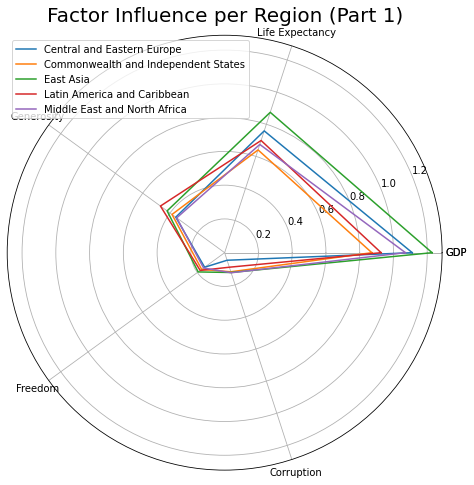

In [21]:
# The values of the factors per region were made into a list.
CEE_values = to_plot_list.loc[0].drop('region').values.flatten().tolist()
CIS_values = to_plot_list.loc[1].drop('region').values.flatten().tolist()
EA_values = to_plot_list.loc[2].drop('region').values.flatten().tolist()
LAC_values = to_plot_list.loc[3].drop('region').values.flatten().tolist()
ME_NA_values = to_plot_list.loc[4].drop('region').values.flatten().tolist()

# Updating the lists to complete the circle for our graph later on.
CEE_values = [*CEE_values, CEE_values[0]]
CIS_values = [*CIS_values, CIS_values[0]]
EA_values = [*EA_values, EA_values[0]]
LAC_values = [*LAC_values, LAC_values[0]]
ME_NA_values = [*ME_NA_values, ME_NA_values[0]]

#Graphing the radar chart.
label_loc = np.linspace(start=0, stop=2 * np.pi, num=6)

pl.figure(figsize=(8, 8))
pl.subplot(polar=True)

pl.plot(label_loc, CEE_values, label='Central and Eastern Europe')
pl.plot(label_loc, CIS_values, label='Commonwealth and Independent States')
pl.plot(label_loc, EA_values, label='East Asia')
pl.plot(label_loc, LAC_values, label='Latin America and Caribbean')
pl.plot(label_loc, ME_NA_values, label='Middle East and North Africa')

pl.title('Factor Influence per Region (Part 1)', size=20)
lines, labels = pl.thetagrids(np.degrees(label_loc), labels=categories)
pl.legend()
pl.show()

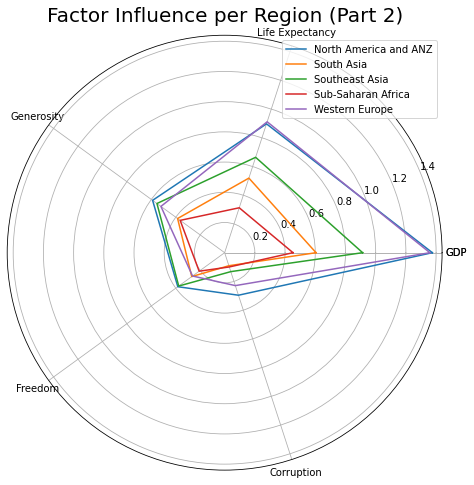

In [22]:
# The values of the factors per region were made into a list.
NA_ANZ_values = to_plot_list.loc[5].drop('region').values.flatten().tolist()
SA_values = to_plot_list.loc[6].drop('region').values.flatten().tolist()
SEA_values = to_plot_list.loc[7].drop('region').values.flatten().tolist()
SSA_values = to_plot_list.loc[8].drop('region').values.flatten().tolist()
WE_values = to_plot_list.loc[9].drop('region').values.flatten().tolist()

# Updating the lists to complete the circle for our graph later on.
NA_ANZ_values = [*NA_ANZ_values, NA_ANZ_values[0]]
SA_values = [*SA_values, SA_values[0]]
SEA_values = [*SEA_values, SEA_values[0]]
SSA_values = [*SSA_values, SSA_values[0]]
WE_values = [*WE_values, WE_values[0]]

#Graphing the radar chart.
label_loc = np.linspace(start=0, stop=2 * np.pi, num=6)

pl.figure(figsize=(8, 8))
pl.subplot(polar=True)

pl.plot(label_loc, NA_ANZ_values, label='North America and ANZ')
pl.plot(label_loc, SA_values, label='South Asia')
pl.plot(label_loc, SEA_values, label='Southeast Asia')
pl.plot(label_loc, SSA_values, label='Sub-Saharan Africa')
pl.plot(label_loc, WE_values, label='Western Europe')

pl.title('Factor Influence per Region (Part 2)', size=20)
lines, labels = pl.thetagrids(np.degrees(label_loc), labels=categories)
pl.legend()
pl.show()

<ipython-input-23-fd28a106a25f>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  to_plot_list = rcdata.groupby(by='region', as_index=False)['gdp_hscore', 'lifeexp_hscore', 'freedom_hscore',


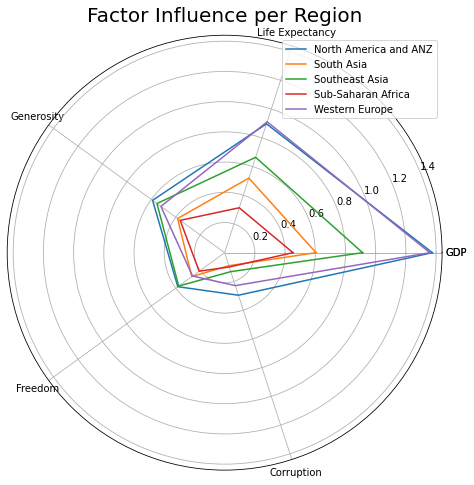

In [23]:
# categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']

# restaurant_1 = [4, 4, 5, 4, 3]
# restaurant_2 = [5, 5, 4, 5, 2]
# restaurant_3 = [3, 4, 5, 3, 5]

categories = ['GDP', 'Life Expectancy', 'Generosity', 'Freedom', 'Corruption', 'GDP']

to_plot_list = rcdata.groupby(by='region', as_index=False)['gdp_hscore', 'lifeexp_hscore', 'freedom_hscore', 
                                                           'generosity_hscore', 'corruption_hscore'].mean()
# to_plot_list

# top50_2018 = whrfinal.loc[whrfinal['year'] == 2018].copy()


NA_ANZ_values = to_plot_list.loc[5].drop('region').values.flatten().tolist()
SA_values = to_plot_list.loc[6].drop('region').values.flatten().tolist()
SEA_values = to_plot_list.loc[7].drop('region').values.flatten().tolist()
SSA_values = to_plot_list.loc[8].drop('region').values.flatten().tolist()
WE_values = to_plot_list.loc[9].drop('region').values.flatten().tolist()

NA_ANZ_values = [*NA_ANZ_values, NA_ANZ_values[0]]
SA_values = [*SA_values, SA_values[0]]
SEA_values = [*SEA_values, SEA_values[0]]
SSA_values = [*SSA_values, SSA_values[0]]
WE_values = [*WE_values, WE_values[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=6)

pl.figure(figsize=(8, 8))
pl.subplot(polar=True)

pl.plot(label_loc, NA_ANZ_values, label='North America and ANZ')
pl.plot(label_loc, SA_values, label='South Asia')
pl.plot(label_loc, SEA_values, label='Southeast Asia')
pl.plot(label_loc, SSA_values, label='Sub-Saharan Africa')
pl.plot(label_loc, WE_values, label='Western Europe')


pl.title('Factor Influence per Region', size=20)
lines, labels = pl.thetagrids(np.degrees(label_loc), labels=categories)
pl.legend()
pl.show()

### Choropleth Map

Renaming the countries of the final dataframe to match the name of the countries in the map that will be used.

In [24]:
replacenames = whrfinal
replacenames.replace('United States','United States of America',inplace=True)
replacenames.replace('Bosnia and Herzegovina','Bosnia and Herz.',inplace=True)
replacenames.replace('Congo (Brazzaville)','Congo',inplace=True)
replacenames.replace('Congo (Kinshasa)','Dem. Rep. Congo',inplace=True)
replacenames.replace('Dominican Republic','Dominican Rep.',inplace=True)
replacenames.replace('Ivory Coast','CÃ´te d\'Ivoire',inplace=True)
replacenames.replace('Palestinian Territories','Palestine',inplace=True)
replacenames.replace('South Sudan','S. Sudan',inplace=True)

replacenames['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herz.',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Dem. Rep. Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Rep.', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       "CÃ´te d'Ivoire", 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia',
       'Mad

Importing the map that will be used in creating the choropleth map and merging the final dataframe with the geometry of the country.

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name':'country'})
for_plotting = pd.merge(world, replacenames, on=['country'], how='left')

#### Happiness Scores

Creating a choropleth map for each country based on `happiness_score`.

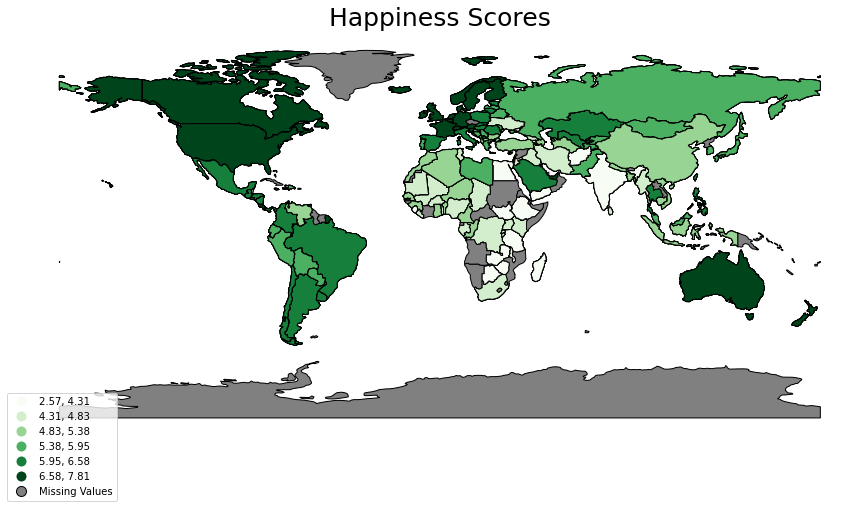

In [26]:
cmHS = for_plotting.plot(column='happiness_score', cmap='Greens', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);
#add title to the map
cmHS.set_title('Happiness Scores', fontdict={'fontsize':25})

#remove axes
cmHS.set_axis_off()

#move legend to an empty space
cmHS.get_legend().set_bbox_to_anchor((.12,.12))

#### Influence of GDP on the Happiness Score

Creating a choropleth map for each country based on `gdp_hscore`.

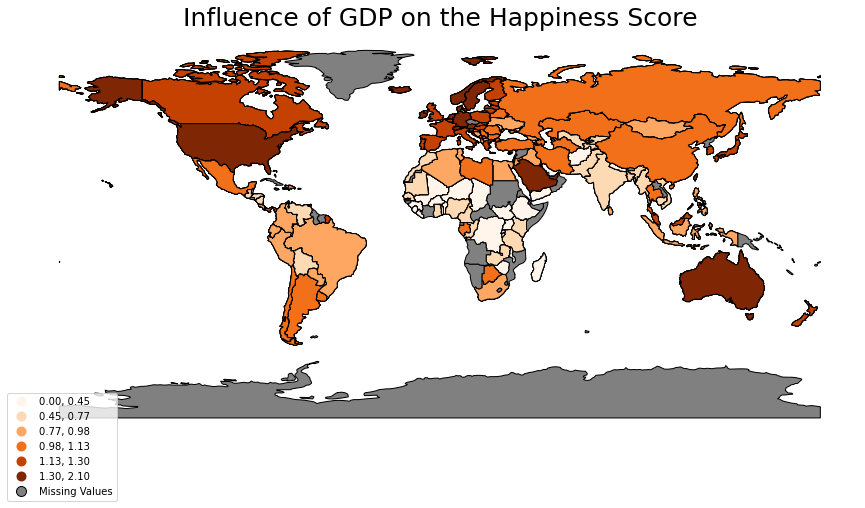

In [27]:
cmGDP = for_plotting.plot(column='gdp_hscore', cmap='Oranges', figsize=(15,9),
                           scheme='quantiles', k=6, edgecolor='black',
                           missing_kwds={"color": "grey", "label": "Missing Values"}, legend = True);

#add title to the map
cmGDP.set_title('Influence of GDP on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmGDP.set_axis_off()

#move legend to an empty space
cmGDP.get_legend().set_bbox_to_anchor((.12,.12))

#### Influence of Life Expectancy on the Happiness Score

Creating a choropleth map for each country based on `lifeexp_hscore`.

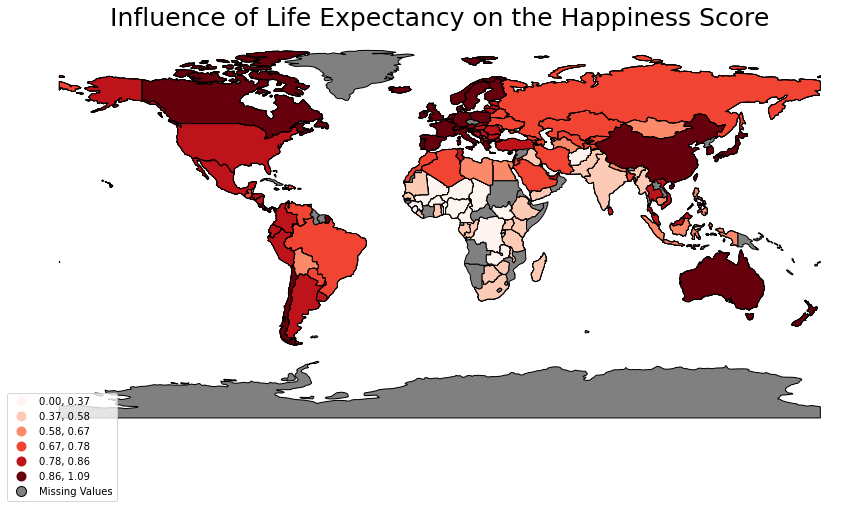

In [28]:
cmLE = for_plotting.plot(column='lifeexp_hscore', cmap='Reds', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmLE.set_title('Influence of Life Expectancy on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmLE.set_axis_off()

#move legend to an empty space
cmLE.get_legend().set_bbox_to_anchor((.12,.12))

#### Influence of Freedom on the Happiness Score

Creating a choropleth map for each country based on `freedom_hscore`.

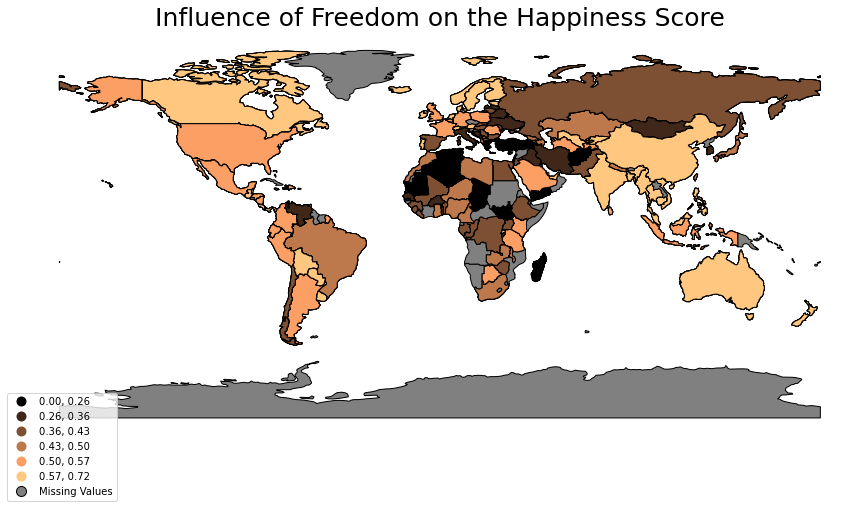

In [29]:
cmF = for_plotting.plot(column='freedom_hscore', cmap='copper', figsize=(15,9),   
                         scheme='quantiles', k=6, edgecolor='black',
                         missing_kwds={"color": "grey","label": "Missing Values"},legend = True);

#add title to the map
cmF.set_title('Influence of Freedom on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmF.set_axis_off()

#move legend to an empty space
cmF.get_legend().set_bbox_to_anchor((.12,.12))

#### Influence of Generosity on the Happiness Score

Creating a choropleth map for each country based on `generosity_hscore`.

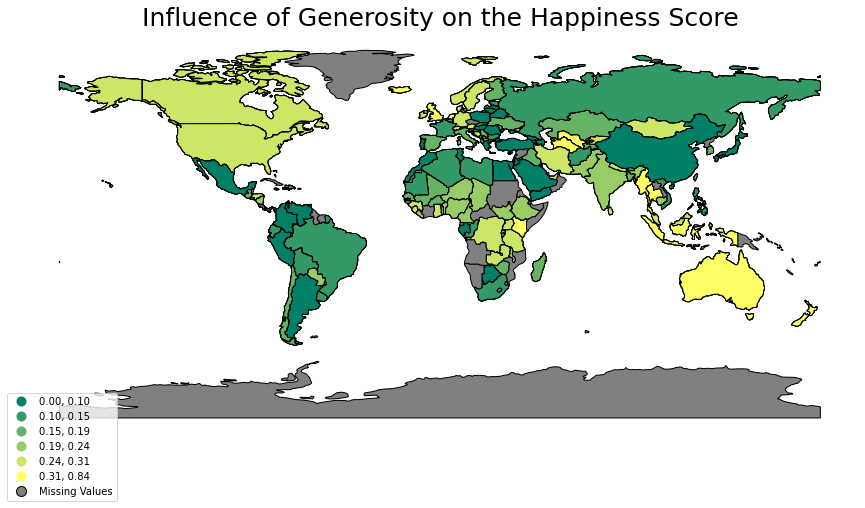

In [30]:
cmG = for_plotting.plot(column='generosity_hscore', cmap='summer', figsize=(15,9),
                        scheme='quantiles', k=6, edgecolor='black',
                        missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmG.set_title('Influence of Generosity on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmG.set_axis_off()

#move legend to an empty space
cmG.get_legend().set_bbox_to_anchor((.12,.12))

#### Influence of Corruption on the Happiness Score

Creating a choropleth map for each country based on `corruption_hscore`.

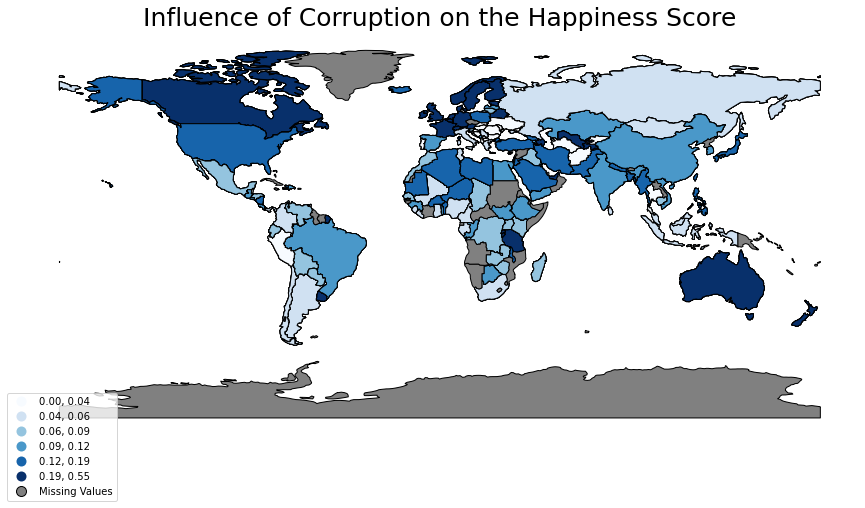

In [31]:
cmC = for_plotting.plot(column='corruption_hscore', cmap='Blues', figsize=(15,9),   
                        scheme='quantiles', k=6, edgecolor='black',
                        missing_kwds={"color": "grey","label": "Missing Values"},legend = True);

#add title to the map
cmC.set_title('Influence of Corruption on the Happiness Score', fontdict={'fontsize':25})

#remove axes
cmC.set_axis_off()

#move legend to an empty space
cmC.get_legend().set_bbox_to_anchor((.12,.12))

#### Actual GDP

Creating a choropleth map for each country based on `actual_gdp`.

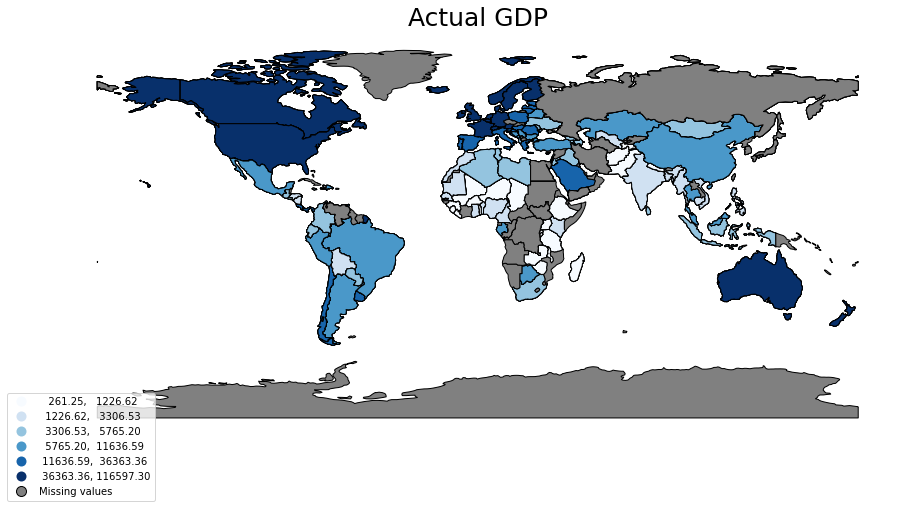

In [32]:
cmAGDP = for_plotting.plot(column='actual_gdp',cmap='Blues', figsize=(15,9), 
                           scheme='quantiles', k=6, edgecolor='black',  
                           missing_kwds={"color": "grey", "label": "Missing values"},legend = True);

#add title to the map
cmAGDP.set_title('Actual GDP', fontdict={'fontsize':25})

#remove axes
cmAGDP.set_axis_off()

#move legend to an empty space
cmAGDP.get_legend().set_bbox_to_anchor((.12,.12))

#### Actual Life Expectancy

Creating a choropleth map for each country based on `actual_lifeexp`.

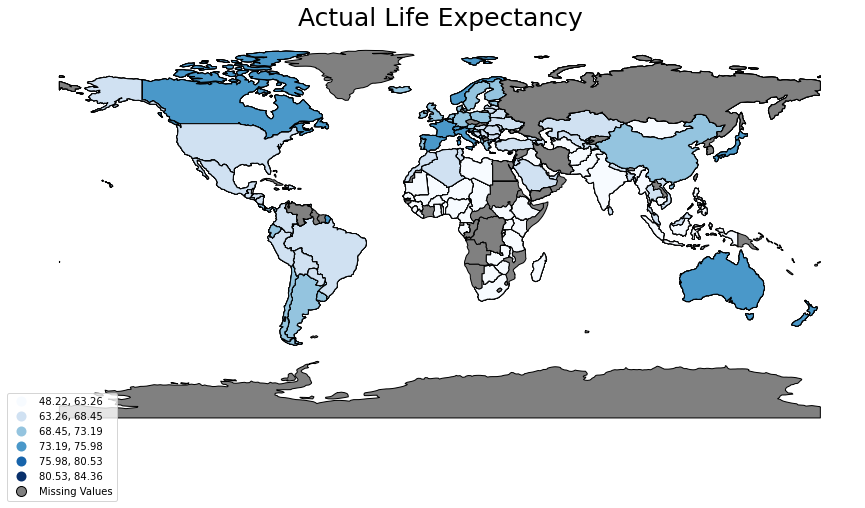

In [33]:
cmALE = for_plotting.plot(column='actual_lifeexp', cmap='Blues', figsize=(15,9),
                          scheme='quantiles', k=6, edgecolor='black', 
                          missing_kwds={"color": "grey", "label": "Missing Values"},legend = True);

#add title to the map
cmALE.set_title('Actual Life Expectancy', fontdict={'fontsize':25})

#remove axes
cmALE.set_axis_off()

#move legend to an empty space
cmALE.get_legend().set_bbox_to_anchor((.12,.12))

#### Actual Crime Rate

Creating a choropleth map for each country based on `actual_crime`.

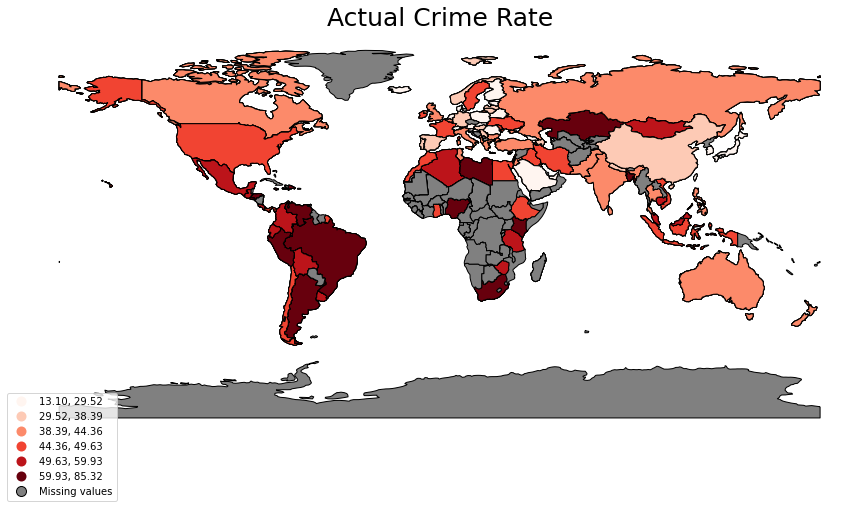

In [34]:
cmACR = for_plotting.plot(column='actual_crime', cmap='Reds', figsize=(15,9),
                          scheme='quantiles', k=6, edgecolor='black',
                          missing_kwds={"color": "grey", "label": "Missing values"},legend = True);

#add title to the map
cmACR.set_title('Actual Crime Rate', fontdict={'fontsize':25})

#remove axes
cmACR.set_axis_off()

#move legend to an empty space
cmACR.get_legend().set_bbox_to_anchor((.12,.12))

### Correlation

#### Heatmap of Correlations Between Variables

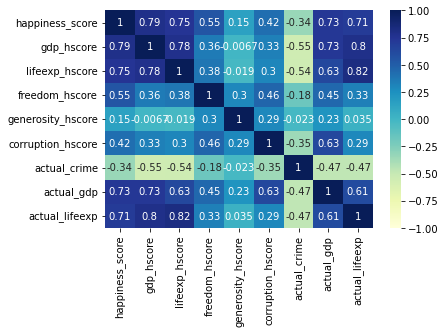

In [35]:
data_to_corr = whrfinal[['happiness_score', 'gdp_hscore', 'lifeexp_hscore', 'freedom_hscore', 'generosity_hscore', 
                         'corruption_hscore', 'actual_crime', 'actual_gdp', 'actual_lifeexp']]

data_corr_heatmap = sns.heatmap(data_to_corr.corr(), 
                                center=0, 
                                cmap="YlGnBu", 
                                annot=True, 
                                vmin=-1, 
                                vmax=1)

### Scatter Plot

#### Happiness Score and Actual GDP

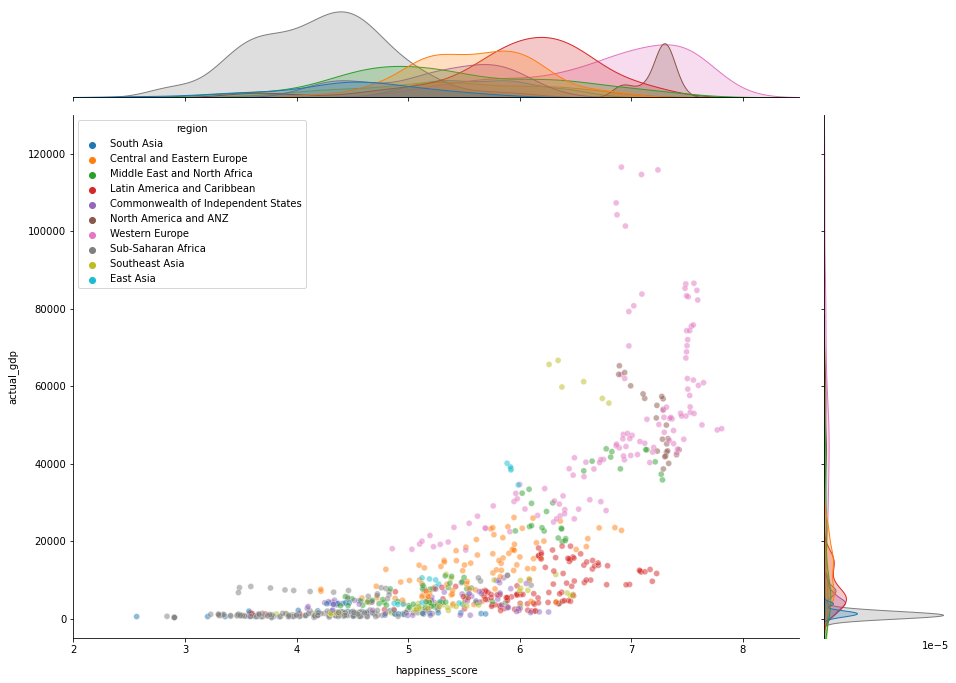

In [36]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="happiness_score", 
                           y="actual_gdp", 
                           hue="region",  
                           alpha=0.5, 
                           xlim = (2, 8.5), 
                           ylim = (-5000, 130000))

data_to_sp.set_axis_labels("happiness_score", "actual_gdp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

#### Happiness Score and Actual Life Expectancy

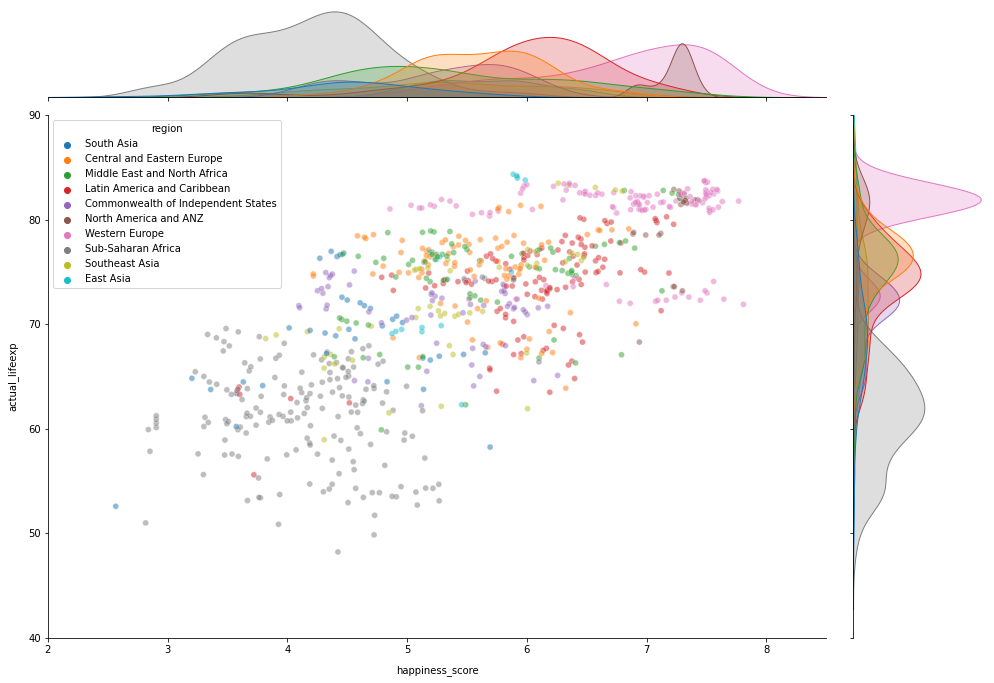

In [37]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="happiness_score", 
                           y="actual_lifeexp", 
                           hue="region",  
                           alpha=0.5, 
                           xlim = (2, 8.5), 
                           ylim = (40, 90))

data_to_sp.set_axis_labels("happiness_score", "actual_lifeexp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

#### Happiness Score and Actual Crime Rate

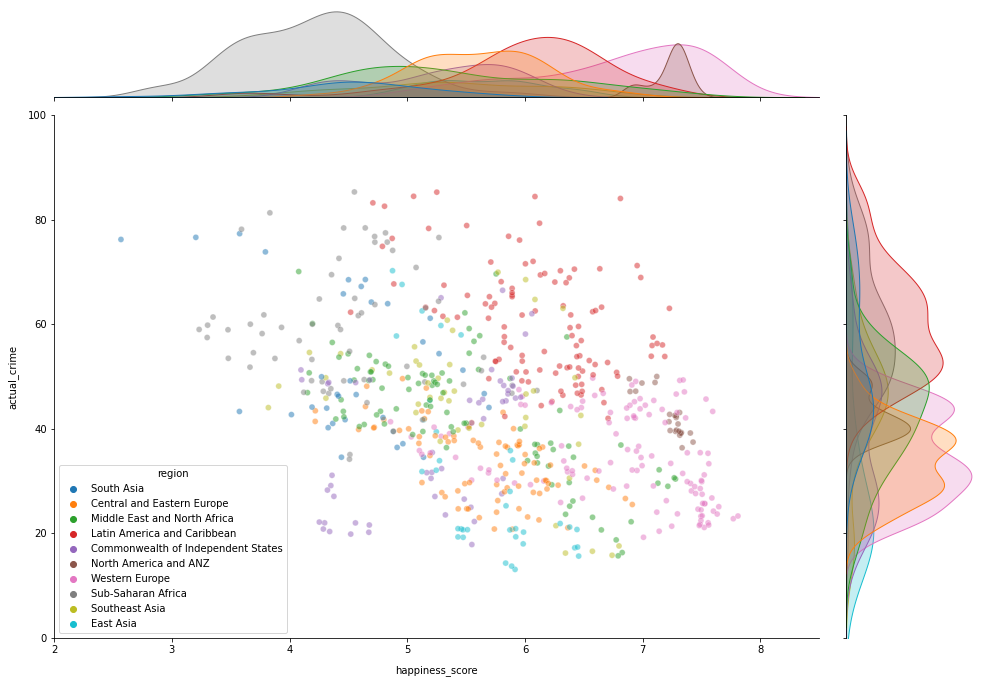

In [38]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="happiness_score", 
                           y="actual_crime", 
                           hue="region",  
                           alpha=0.5, 
                           xlim = (2, 8.5), 
                           ylim = (0, 100))

data_to_sp.set_axis_labels("happiness_score", "actual_crime", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

#### Influence of GDP on the Happiness Score and Actual GDP

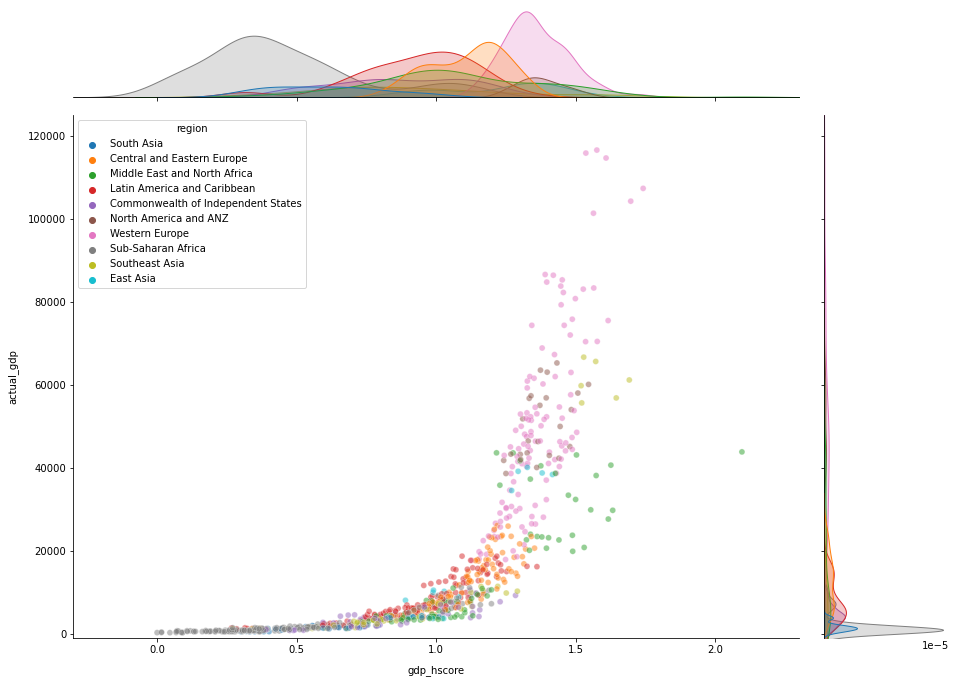

In [39]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="gdp_hscore", 
                           y="actual_gdp", 
                           hue="region",  
                           alpha=0.5, 
                           xlim = (-0.3, 2.3), 
                           ylim = (-1000, 125000))

data_to_sp.set_axis_labels("gdp_hscore", "actual_gdp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)

#### Influence of Life Expectancy on the Happiness Score and Actual Life Expectancy

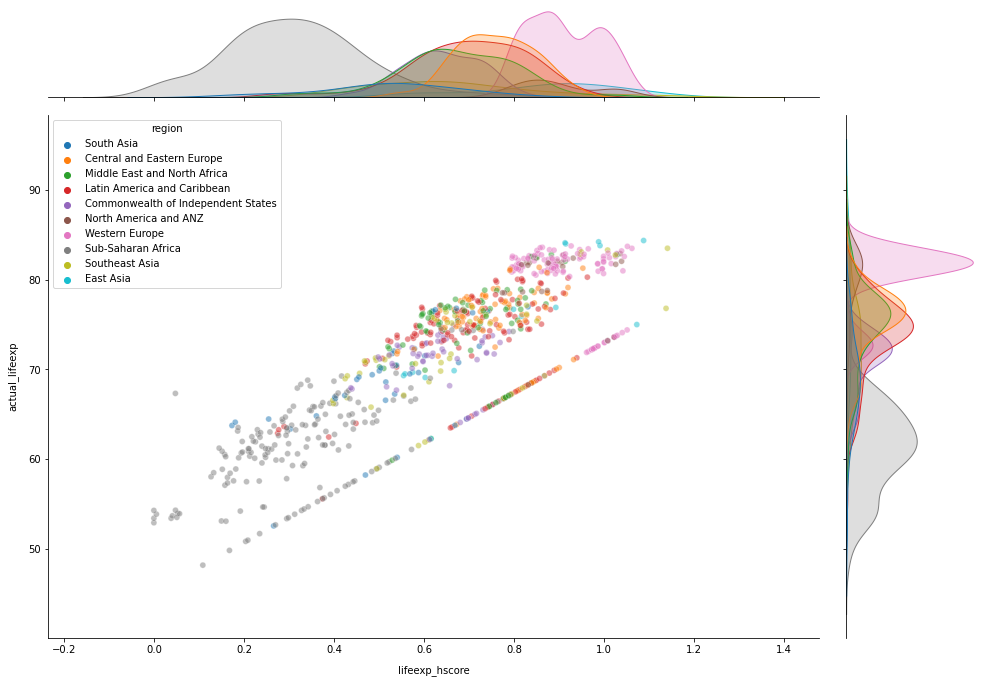

In [40]:
data_to_sp = sns.jointplot(data = whrfinal,
                           x="lifeexp_hscore", 
                           y="actual_lifeexp", 
                           hue="region",
                           alpha=0.5)

data_to_sp.set_axis_labels("lifeexp_hscore", "actual_lifeexp", labelpad=10)
data_to_sp.fig.set_size_inches(15, 10)